In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

In [8]:
print(data.head())
print(data.tail())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [9]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
 X = data.iloc[:,[3,4]].values

In [19]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [16]:
from sklearn.cluster import KMeans
wcss=[]

In [18]:
# Elbow method to find optimal number of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

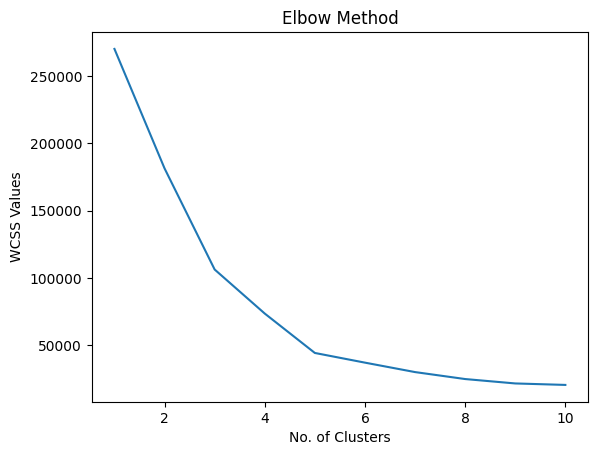

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()

### Elbow at k=5, which is the optimal number of clusters

### Training the model

In [23]:
kmeans_model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [24]:
y_kmeans = kmeans_model.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


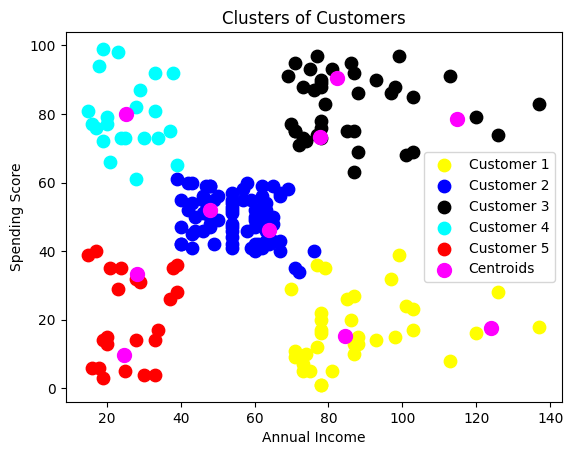

In [27]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 80, c = "yellow", label = "Customer 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 80, c = "blue", label = "Customer 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 80, c = "black", label = "Customer 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 80, c = "cyan", label = "Customer 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 80, c = "red", label = "Customer 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = "magenta", label = "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### Red cluster is the target audience, as their salary and spending is quite well and the maximum number of people are included in this area